<a href="https://colab.research.google.com/github/InowaR/colab/blob/main/network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 0.96


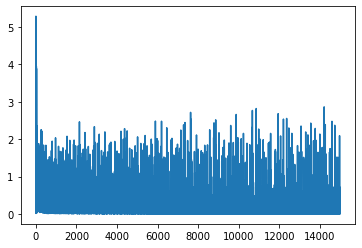

In [1]:
import random
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt


###############
INPUT = 4     #
HIDDEN = 10   #  network 4-10-3
OUTPUT = 3    #   
###############

def relu(t):
  return np.maximum(t, 0)

def softmax(t):
  out = np.exp(t)
  return out / np.sum(out)

def sparse_cross_entropy(z, y):       # plot
  return -np.log(z[0, y])               

def to_full(y, num_classes):          # target vector to exit vector
  y_full = np.zeros((1, num_classes))  
  y_full[0, y] = 1                      
  return y_full                         

def relu_derivative(t):
  return (t >= 0).astype(float)

#########################################################################################                                                          #
iris = datasets.load_iris()                                                             #  dataset
dataset = [(iris.data[i][None, ...], iris.target[i]) for i in range(len(iris.target))]  #
#########################################################################################

# x = input vector 
# y = target vector

W1 = np.random.randn(INPUT, HIDDEN)   #
b1 = np.random.randn(1, HIDDEN)       #  matrix weights, vector biases
W2 = np.random.randn(HIDDEN, OUTPUT)  #
b2 = np.random.randn(1, OUTPUT)       #

ETA = 0.001        # learning rate
NUM_EPOCHS = 100   # full iterations
loss_array = []    # errors

for epoch in range(NUM_EPOCHS):

  random.shuffle(dataset)  # shuffle data

  for i in range(len(dataset)):

    x, y = dataset[i]

    ######################
    t1 = x @ W1 + b1     #
    h1 = relu(t1)        #
    t2 = h1 @ W2 + b2    #  feed forward
    z = softmax(t2)      #
    ######################   

    E = sparse_cross_entropy(z, y)  # plot
    y_full = to_full(y, OUTPUT)     # one-hot encoding (0,1)

    ########################################
    dE_dt2 = z - y_full                    #
    dE_dW2 = h1.T @ dE_dt2                 #
    dE_db2 = dE_dt2                        #
    dE_dh1 = dE_dt2 @ W2.T                 #  gradient
    dE_dt1 = dE_dh1 * relu_derivative(t1)  #
    dE_dW1 = x.T @ dE_dt1                  #
    dE_db1 = dE_dt1                        #
    ########################################

    #########################
    W1 = W1 - ETA * dE_dW1  #
    b1 = b1 - ETA * dE_db1  #  update weights
    W2 = W2 - ETA * dE_dW2  #
    b2 = b2 - ETA * dE_db2  #
    #########################

    loss_array.append(E)

def predict(x):        
  t1 = x @ W1 + b1 
  h1 = relu(t1)                  
  t2 = h1 @ W2 + b2        
  z = softmax(t2)
  return z

def calc_accuracy():
  correct = 0
  for x, y in dataset:
    z = predict(x)
    y_pred = np.argmax(z)    # output indexes after predict()
    if y_pred == y:
      correct += 1
  accuracy = correct / len(dataset)
  return accuracy

accuracy = calc_accuracy()
print(f"Accuracy: {accuracy}")
plt.plot(loss_array)
plt.show()
